# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
upload=files.upload()

Saving tvmarketing.csv to tvmarketing.csv


# Part-1


### Linear Regressor with OLS method

In [ ]:
class MyLRFromOLS:


  def __init__(self):
      self.m = None
      self.b = None


  def fit(self,X_train,y_train):
    sum_x = np.sum(X_train)
    sum_y = np.sum(y_train)
    sum_xy = np.sum(X_train * y_train)
    sum_x2 = np.sum(X_train ** 2)
    n = len(X_train)
    # Calculate values of m and b


    self.m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    self.b = (sum_y - self.m * sum_x) / n


  def predict(self,X_test):

    return self.m * X_test + self.b

  def get_coeff(self):
    return self.m, self.b

    # Write code to print the value of m and b

In [ ]:
#load dataset
df = pd.read_csv('tvmarketing.csv')
df.shape

(200, 2)

In [ ]:
# Separate input and output columns
X = df['TV']
y = df['Sales']

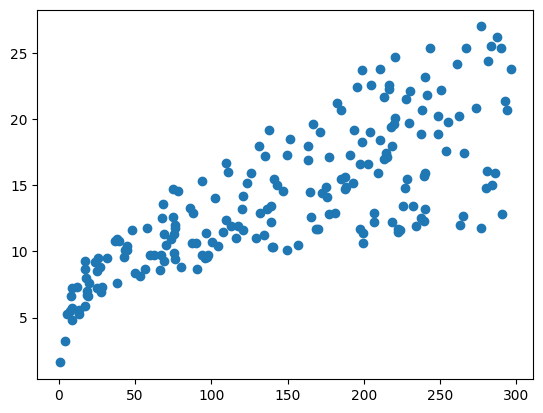

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X,y)
plt.show()

In [ ]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

  ### Prediction time

In [ ]:
olslr = MyLRFromOLS()


In [ ]:
olslr.fit(X_train,y_train)

In [ ]:
olslr_pred = olslr.predict(X_test)

In [ ]:
#View predictions
olslr_pred

112    15.783445
29     10.270079
182     9.514680
199    18.742092
193    15.316566
85     16.701464
10     10.034017
54     20.347315
115    10.506142
35     21.816147
12      7.815032
92     17.986692
13     11.681207
126     6.975699
174    18.233246
2       7.468807
44      7.883227
3      14.513954
113    17.561780
14     17.273260
23     18.542750
25     20.357807
6       9.582876
134     8.502235
165    18.867991
173    15.400499
45     15.751970
65     10.186146
48     18.485046
122    18.317180
178    21.081731
64     13.443805
9      17.047689
57     13.711342
78      6.849799
71     12.326444
128    18.123084
176    19.597162
131    20.478461
53     16.145407
Name: TV, dtype: float64

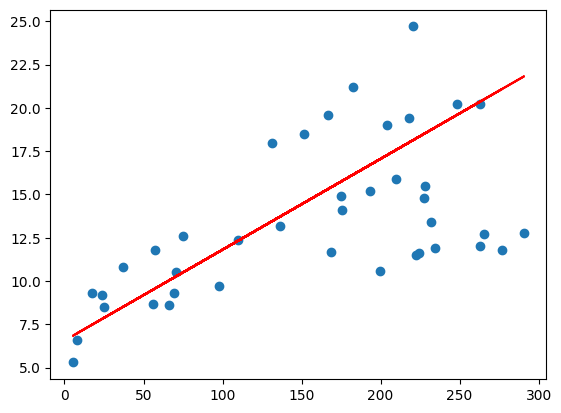

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,olslr_pred,c='r')
plt.show()

In [ ]:
#Get values of m and b
olslr.get_coeff()

(0.05245828085802831, 6.566524608650449)

### Linear Regressor with gradient descent


In [ ]:
class MyLRFromGD:

  def __init__(self,learning_rate,epochs):
    self.m = np.random.randn()
    self.b  = np.random.randn()
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    n = len(X)
    print(n)
    for i in range(self.epochs):
      y_pred = self.predict(X)
      # Calculate slope wrt b and m
      dm = -(2 / n) * np.dot(X.T , (y - y_pred))
      db = -(2 / n) * np.sum(y - y_pred)
      self.m -= (self.lr * dm)
      self.b -= (self.lr * db)


  def predict(self,X):
    return self.m * X + self.b


  def get_coeff(self):
    #Write code to get values of m and b
    return self.m, self.b


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [ ]:
#Check with different values of learning_rate and epochs for model convergence
learning_rate = 0.0000001
epochs = 10000
gdlr = MyLRFromGD(learning_rate, epochs)

In [ ]:
gdlr.fit(np.array(X_train),np.array(y_train))

160


In [ ]:
gdlr_pred = gdlr.predict(np.array(X_test))

In [ ]:
# View predictions
gdlr_pred.shape

(40,)

In [ ]:
# Get values of m and b
gdlr.get_coeff()

(0.08783695355622934, -0.3439659061904381)

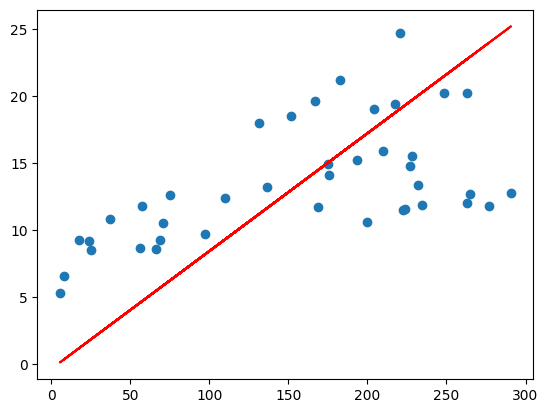

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,gdlr_pred,c='r')
plt.show()

# Part-2

### R2 Score
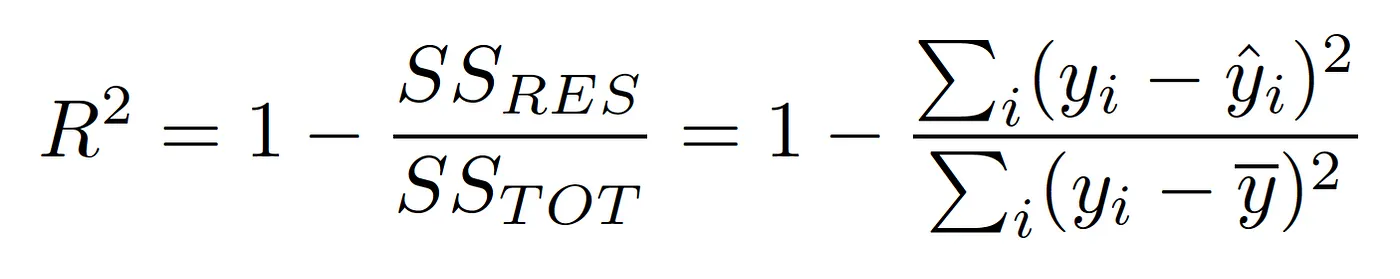

### MEAN ABSOLUTE ERROR
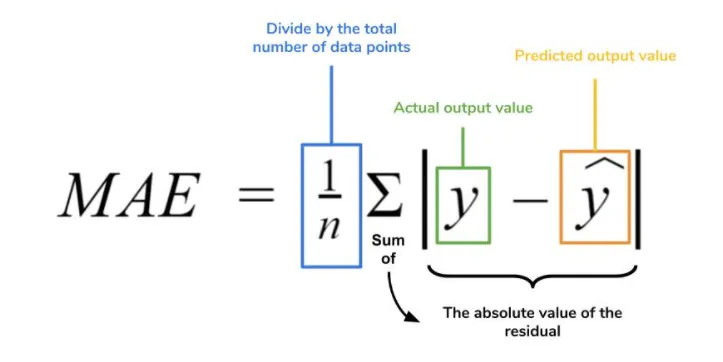

### ROOT MEAN SQUARED ERROR
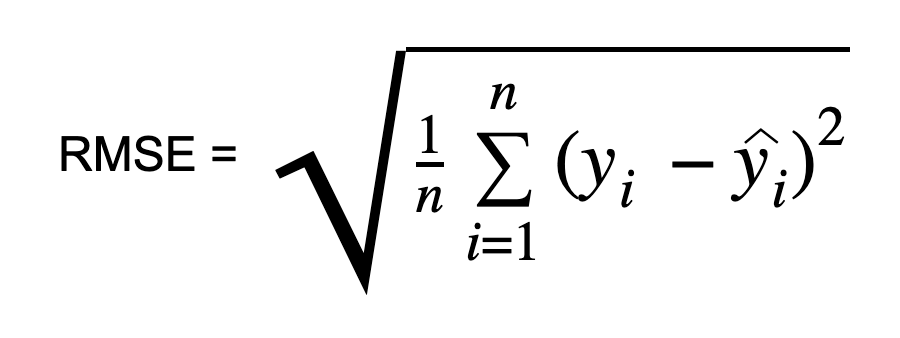

### Evaluation time
Let's see how does both of our models perform.

In [ ]:
# Implement R2 Score, MAE and RMSE

class evaluate:


  def r2score(self,y_pred,y):
    #Write code here

    y_mean = np.mean(y)
    ss_tot = np.sum((y - y_mean)**2)
    ss_res = np.sum((y - y_pred)**2)
    r2 = 1 - (ss_res/ss_tot)
    return r2


  def mae(self,y_pred,y):
    #Write code here
    mae = np.mean(abs(y - y_pred))
    return mae


  def rmse(self,y_pred,y):
    #write code here
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    return rmse


In [ ]:
# First calculate all the metrics for olslr_pred
eval = evaluate()

In [ ]:
eval.r2score(olslr_pred,y_test)

0.04217977642787851

In [ ]:
eval.rmse(olslr_pred,y_test)

4.2181623375351425

In [ ]:
eval.mae(olslr_pred,y_test)

3.2353682995006414

In [ ]:
# Now for gdlr_pred

In [ ]:
eval.rmse(gdlr_pred,y_test)

6.109858109923025

In [ ]:
eval.mae(gdlr_pred,y_test)

5.2597922598888704

In [ ]:
eval.r2score(gdlr_pred,y_test)

-1.0095539612307207

# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!



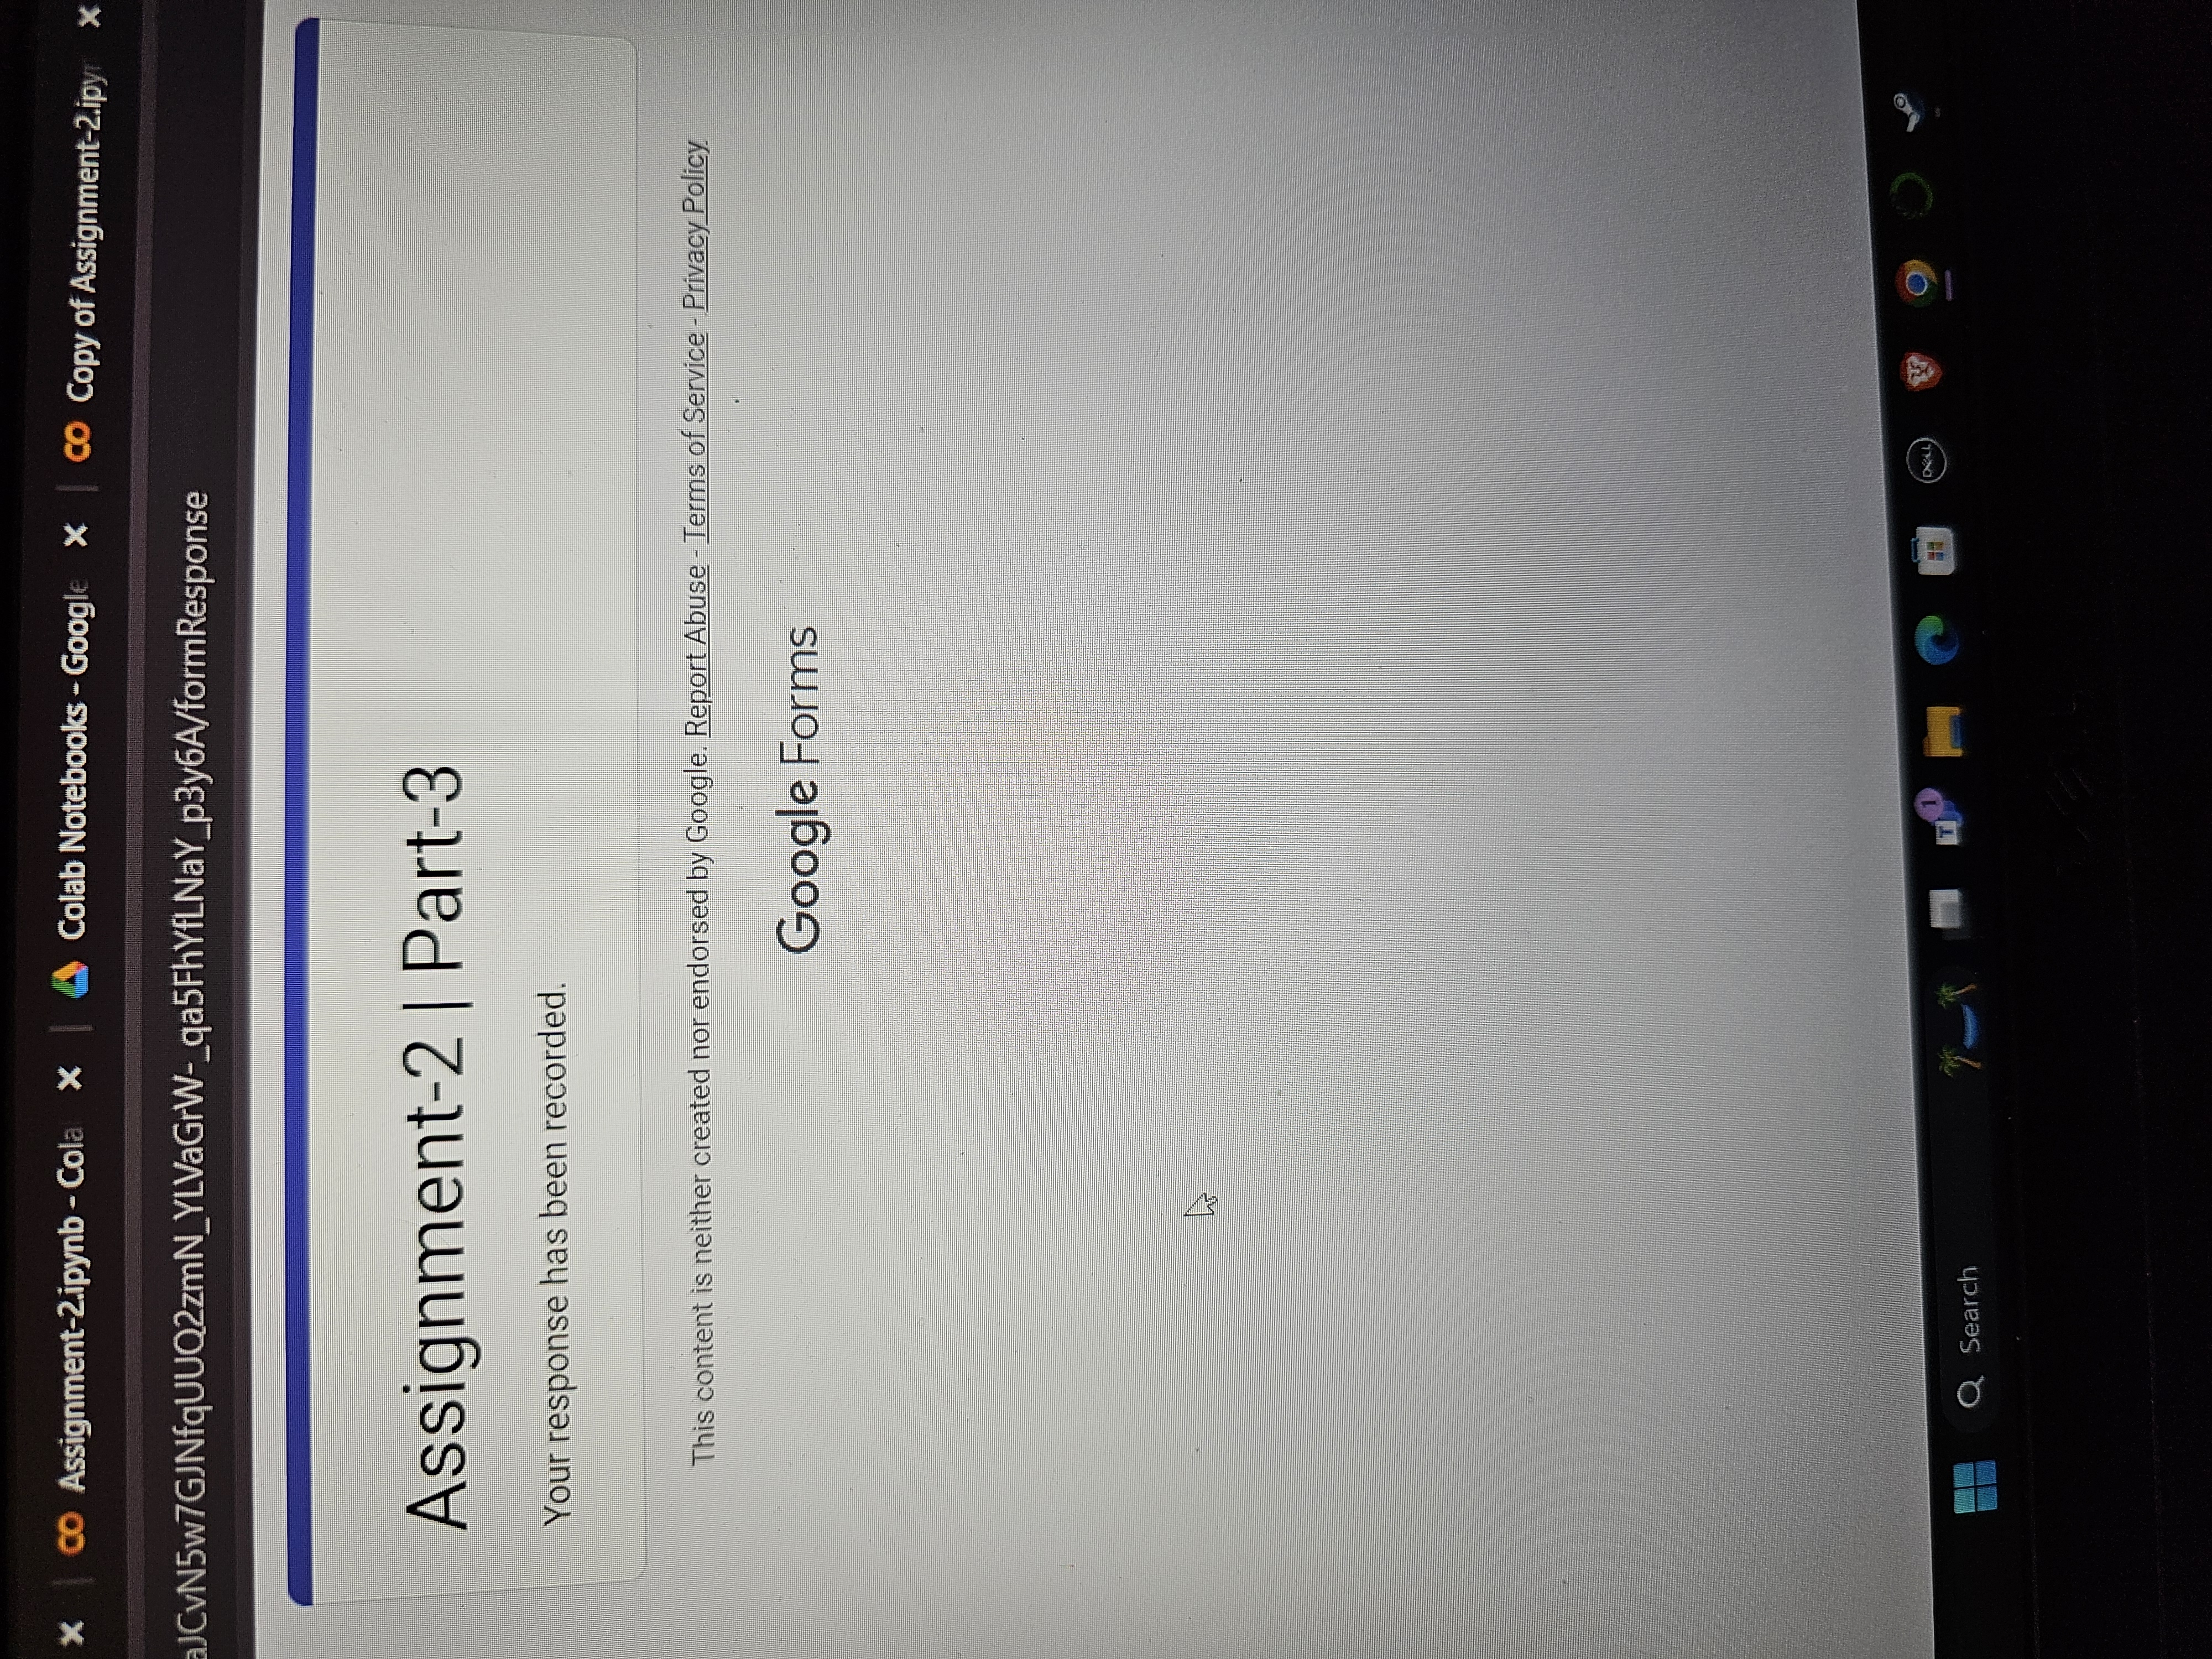